<h1>UK Road Safety Analysis</h1>

<p>This notebook analyzes road accident data in the UK. The goal is to identify trends and patterns to improve road safety.</p>

<h2>Data Source & Representativeness</h2>
<p>
This dataset is derived from the <a href="https://data.gov.uk/dataset/road-accidents-safety-data" target="_blank">UK Department for Transport (DfT)</a> official road safety records. 
It contains police-reported road traffic accidents across multiple districts including Southend-on-Sea, Chelmsford, and Epping Forest. 
In total, the dataset includes approximately 300,000 rows, covering the period from <strong>1 January 2021 to 31 December 2022</strong>. Each row represents a reported accident record.
</p>

<p>
Because the data comes from official police records, it represents the full population of <strong>reported crashes</strong> within the covered geography and timeframe, rather than just a sample. 
However, very minor accidents that were never reported to the police are not included. 
As such, the analysis and predictions made in this project reflect trends in reported crashes, not all incidents that may occur on the road.
</p>

<h2>Data Overview</h2>
<p>The dataset contains information about road accidents in the UK, including:</p>
<ul>
  <li>Accident details (e.g. time, severity, location).</li>
  <li>Environmental conditions (e.g. weather, lighting, road surface).</li>
  <li>Junction and road characteristics (e.g. junction type, speed limit, road type).</li>
  <li>The number of casualties.</li>
</ul>
<p>With this structure, we can begin cleaning, exploring, and analyzing the data to identify meaningful patterns.</p>

<h2>Analysis</h2>
<ol>
  <li>Data Cleaning</li>
  <li>Exploratory Data Analysis & Visualization</li>
  <li>Predictions (Machine Learning Modeling)</li>
  <li>Conclusion</li>
</ol>

<hr>
<p><strong>Note:</strong> All results reflect <em>reported crashes</em> only. Unreported minor accidents are not included in this dataset.</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

<h2>Loading the Data, Cleaning, and Formatting</h2>
<p>First, we load the data using Pandas and use <code>.head()</code> to preview the dataset. This allows us to see the structure of the data and decide which columns will be most useful for generating insights.</p>


In [2]:
data = pd.read_csv('Road Accident Data.csv')

data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


<p>Next, we will remove all the columns that we won’t be using by applying the <code>.drop()</code> method to the DataFrame. After dropping these columns, we use <code>.info()</code> to check which columns remain and to verify whether there is any missing data in the dataset.</p>

In [3]:
data.drop(['Carriageway_Hazards', 'Police_Force', 'Vehicle_Type', 'Accident Date', 'Accident_Index', 'Latitude', 'Longitude'], axis=1, inplace=True, errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Day_of_Week                 307973 non-null  object
 1   Junction_Control            307973 non-null  object
 2   Junction_Detail             307973 non-null  object
 3   Accident_Severity           307973 non-null  object
 4   Light_Conditions            307973 non-null  object
 5   Local_Authority_(District)  307973 non-null  object
 6   Number_of_Casualties        307973 non-null  int64 
 7   Number_of_Vehicles          307973 non-null  int64 
 8   Road_Surface_Conditions     307973 non-null  object
 9   Road_Type                   307973 non-null  object
 10  Speed_limit                 307973 non-null  int64 
 11  Time                        307956 non-null  object
 12  Urban_or_Rural_Area         307973 non-null  object
 13  Weather_Conditions          3

<p>Before we start exploring the data, we convert the Time column into a 64-bit datetime object. This allows us to perform various calculations when analyzing the dataset. For example, converting the column enables us to calculate the median time, which would not be possible if it were stored as plain strings.</p>
<p>We then use this median value to fill in any missing Time entries that were identified in the previous step. Finally, we verify the changes using .<code>info()</code> and <code>.head()</code> to confirm the column was updated correctly.</p>
<p><bold>Note: All times now display with the date 1900-01-01. This is simply a placeholder added by Pandas when creating a full datetime object. It does not affect calculations or the accuracy of the time values</bold></p>

In [4]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce')

median_time = data['Time'].median()
data['Time'] = data['Time'].fillna(median_time)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Day_of_Week                 307973 non-null  object        
 1   Junction_Control            307973 non-null  object        
 2   Junction_Detail             307973 non-null  object        
 3   Accident_Severity           307973 non-null  object        
 4   Light_Conditions            307973 non-null  object        
 5   Local_Authority_(District)  307973 non-null  object        
 6   Number_of_Casualties        307973 non-null  int64         
 7   Number_of_Vehicles          307973 non-null  int64         
 8   Road_Surface_Conditions     307973 non-null  object        
 9   Road_Type                   307973 non-null  object        
 10  Speed_limit                 307973 non-null  int64         
 11  Time                        307973 non-

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,1,2,Dry,One way street,30,1900-01-01 15:11:00,Urban,Fine no high winds
1,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,11,2,Wet or damp,Single carriageway,30,1900-01-01 10:59:00,Urban,Fine no high winds
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,1,2,Dry,Single carriageway,30,1900-01-01 14:19:00,Urban,Fine no high winds
3,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,1,2,Frost or ice,Single carriageway,30,1900-01-01 08:10:00,Urban,Other
4,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,1,2,Dry,Single carriageway,30,1900-01-01 17:25:00,Urban,Fine no high winds


<h2>Exploratory Data Analysis & Visualization</h2>

<p>
In this section, we begin exploring the dataset to uncover patterns and insights.  
We start by examining <strong>which days of the week crashes are more likely to occur</strong>.  
This helps us understand whether accidents cluster around weekdays, weekends, or specific days, providing valuable context for road safety planning. 
</p>

In [5]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

data['Day_of_Week'] = pd.Categorical(data['Day_of_Week'], categories=day_order, ordered=True)

day_counts = data['Day_of_Week'].value_counts().sort_index()

print(day_counts)

Day_of_Week
Monday       43918
Tuesday      46386
Wednesday    46381
Thursday     45649
Friday       50529
Saturday     41566
Sunday       33544
Name: count, dtype: int64


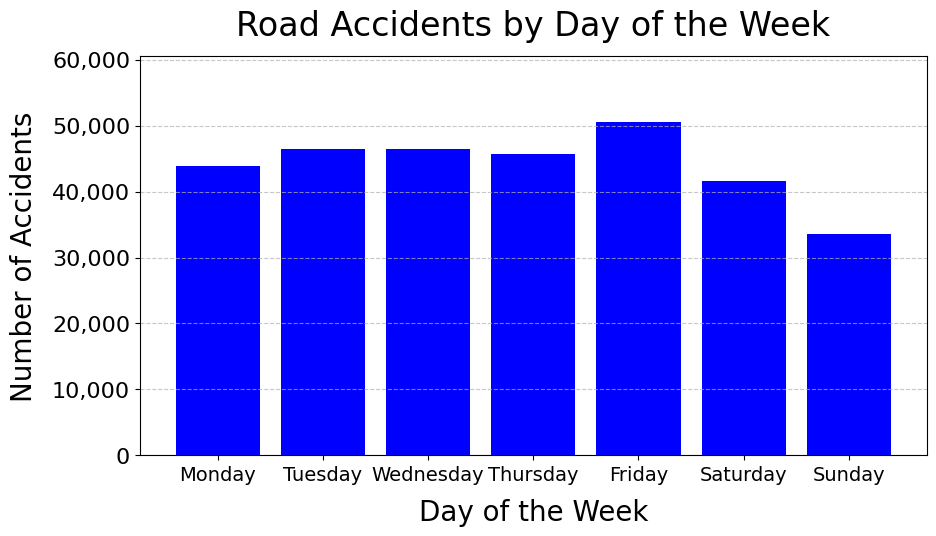

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='blue')
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)
plt.title('Road Accidents by Day of the Week', fontsize=24, pad=15)
plt.xlabel('Day of the Week', fontsize=20, labelpad=10)
plt.ylabel('Number of Accidents', fontsize=20, labelpad=10)
plt.ylim(0, day_counts.max() + 10000)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
monday_to_thursday = day_counts.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday']]

average_mon_to_thu = monday_to_thursday.mean()

print(f'Average total accidents from Monday to Thursday over two years: {average_mon_to_thu:.0f}')

friday_accidents = day_counts.loc['Friday']
saturday_accidents = day_counts.loc['Saturday']
sunday_accidents = day_counts.loc['Sunday']

fri_increase_pct = ((friday_accidents - average_mon_to_thu) / average_mon_to_thu) * 100
fri_increase_num = friday_accidents - average_mon_to_thu

sat_decrease_pct = ((saturday_accidents - friday_accidents) / friday_accidents) * 100
sat_decrease_num = saturday_accidents - friday_accidents

sun_decrease_pct = ((sunday_accidents - average_mon_to_thu) / average_mon_to_thu) * 100
sun_decrease_num = sunday_accidents - average_mon_to_thu

print(f'Friday total accidents: {friday_accidents}')
print(f'Increase from Mon–Thu average: {fri_increase_num:.0f} accidents ({fri_increase_pct:.2f}%)')

print(f'Saturday total accidents: {saturday_accidents}')
print(f'Decrease from Friday: {abs(sat_decrease_num):.0f} accidents ({abs(sat_decrease_pct):.2f}%)')

print(f'Sunday total accidents: {sunday_accidents}')
print(f'Decrease from Mon–Thu average: {abs(sun_decrease_num):.0f} accidents ({abs(sun_decrease_pct):.2f}%)')


Average total accidents from Monday to Thursday over two years: 45584
Friday total accidents: 50529
Increase from Mon–Thu average: 4946 accidents (10.85%)
Saturday total accidents: 41566
Decrease from Friday: 8963 accidents (17.74%)
Sunday total accidents: 33544
Decrease from Mon–Thu average: 12040 accidents (26.41%)


<p>Looking at this chart, we see that Monday through Thursday have similar totals, around <strong>45,583</strong> accidents each over the two-year period.</p>
<p>On Friday, accidents increase by <strong>10.85%</strong>, reaching a total of <strong>50,528</strong> accidents.</p>
<p>Accidents then decrease on Saturday by <strong>18.74%</strong>, and drop further on Sunday to <strong>33,544</strong> accidents, representing a <strong>26.4%</strong> decrease from the Monday–Thursday baseline.</p>

<h2>My Observations</h2>
<p>The data suggests that traffic flow is fairly consistent from Monday to Thursday, leading to relatively stable accident numbers. On Friday, we see a <strong>10.85%</strong> increase in accidents. This could indicate that people are rushing home from work to start their weekend, and that increased traffic in town centres at night may also be a factor.</p>
<p>Accidents then decline on Saturday and Sunday, most likely due to fewer people working. On Sundays in particular, shops being closed and many people using the day to relax may contribute to the lower totals.</p>

<ul>
  <li>Monday–Thursday: Stable traffic and accident counts.</li>
  <li>Friday: 10.85% increase in accidents, likely due to higher evening traffic and weekend travel.</li>
  <li>Saturday: Decrease in accidents as fewer people commute.</li>
  <li>Sunday: Further decrease; leisure day and closed shops may reduce traffic.</li>
</ul>